
# 🧹 Data Cleaning & Preprocessing - Sales Dataset

This notebook covers the complete data cleaning and preprocessing pipeline for a sales dataset including:
- Handling missing values
- Removing duplicates
- Fixing data types
- Encoding categorical variables
- Feature engineering


## 📦 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Set visual style
sns.set(style="whitegrid")


## 📥 2. Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv("sales_data.csv")

# View basic structure
df.head()


,Order ID,Order Date,Customer Name,Region,Product,Category,Sales,Quantity,Discount,Profit
0,sm-7039-405828,2024-07-23,William Bryant,Central,Table,Furniture,1217.80,10,0.08,-81.68
1,Pt-2985-825301,2022-10-20,Benjamin Bentley,East,Laptop,Technology,1852.04,9,0.45,-88.34
2,KJ-4575-679683,2021-03-15,Charles Webb,West,Printer,Technology,632.41,9,0.03,83.61
3,Pc-5914-111200,2022-05-23,Denise Morris,East,Paper,Office Supplies,NaN,3,0.42,0.00
4,Qp-3590-968551,2024-10-17,Stephen Andrews,East,Laptop,Technology,1678.02,8,NaN,-77.77


## 🔍 3. Inspect Data

In [3]:
# Check shape, info, and summary
print("Shape:", df.shape)
df.info()
df.describe(include='all')


Shape: (5200, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       5200 non-null   object 
 1   Order Date     5200 non-null   object 
 2   Customer Name  4917 non-null   object 
 3   Region         5200 non-null   object 
 4   Product        5200 non-null   object 
 5   Category       5200 non-null   object 
 6   Sales          4935 non-null   float64
 7   Quantity       5200 non-null   int64  
 8   Discount       4667 non-null   float64
 9   Profit         5200 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 406.4+ KB


,Order ID,Order Date,Customer Name,Region,Product,Category,Sales,Quantity,Discount,Profit
count,5200,5200,4917,5200,5200,5200,4935.000000,5200.000000,4667.000000,5200.000000
unique,5000,1700,4563,4,12,3,NaN,NaN,NaN,NaN
top,nV-7058-699064,2022-12-02,Michael Johnson,Central,Table,Furniture,NaN,NaN,NaN,NaN
freq,2,9,4,1328,464,1796,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,992.846209,5.459615,0.248110,100.997915
std,NaN,NaN,NaN,NaN,NaN,NaN,580.414609,2.869393,0.144576,267.376709
min,NaN,NaN,NaN,NaN,NaN,NaN,10.550000,1.000000,0.000000,-592.940000
25%,NaN,NaN,NaN,NaN,NaN,NaN,487.140000,3.000000,0.120000,-45.547500
50%,NaN,NaN,NaN,NaN,NaN,NaN,991.250000,5.000000,0.250000,38.590000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1491.015000,8.000000,0.370000,240.335000


## ❌ 4. Handle Missing Values

In [4]:
# Check missing values
df.isnull().sum()


Order ID           0
Order Date         0
Customer Name    283
Region             0
Product            0
Category           0
Sales            265
Quantity           0
Discount         533
Profit             0
dtype: int64

In [5]:
# Fill missing values
df['Customer Name'].fillna("Unknown", inplace=True)
df['Sales'].fillna(df['Sales'].median(), inplace=True)
df['Discount'].fillna(0, inplace=True)


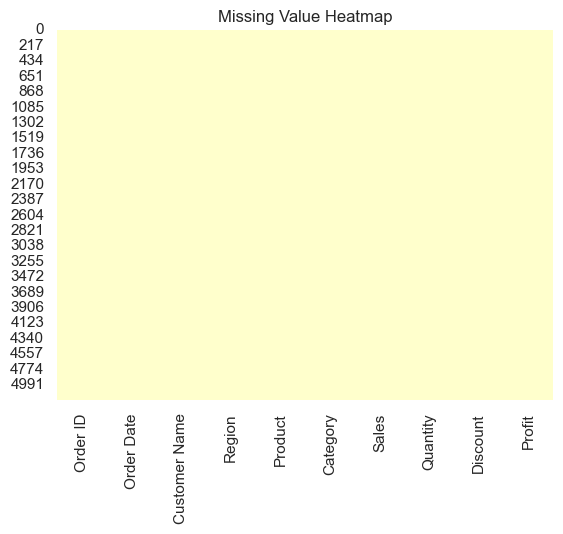

In [6]:
# Visual check
sns.heatmap(df.isnull(), cbar=False, cmap='YlOrRd')
plt.title("Missing Value Heatmap")
plt.show()


## 🔁 5. Remove Duplicates

In [7]:
# Drop duplicates
print("Duplicates before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after:", df.duplicated().sum())


Duplicates before: 200
Duplicates after: 0


## 🧼 6. Fix Data Types

In [8]:
# Convert date column
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Convert categoricals
df['Region'] = df['Region'].astype('category')
df['Category'] = df['Category'].astype('category')
df['Product'] = df['Product'].astype('category')


## 🧪 7. Data Validation

In [9]:
# Check for negative or invalid values
print(df[df['Quantity'] <= 0])
print(df[df['Sales'] < 0])


Empty DataFrame
Columns: [Order ID, Order Date, Customer Name, Region, Product, Category, Sales, Quantity, Discount, Profit]
Index: []
Empty DataFrame
Columns: [Order ID, Order Date, Customer Name, Region, Product, Category, Sales, Quantity, Discount, Profit]
Index: []


## 🧱 8. Encode Categorical Variables

In [10]:
# One-hot encode Region and Category
df_encoded = pd.get_dummies(df, columns=['Region', 'Category'], drop_first=True)
df_encoded.head()


,Order ID,Order Date,Customer Name,Product,Sales,Quantity,Discount,Profit,Region_East,Region_South,Region_West,Category_Office Supplies,Category_Technology
0,sm-7039-405828,2024-07-23,William Bryant,Table,1217.80,10,0.08,-81.68,False,False,False,False,False
1,Pt-2985-825301,2022-10-20,Benjamin Bentley,Laptop,1852.04,9,0.45,-88.34,True,False,False,False,True
2,KJ-4575-679683,2021-03-15,Charles Webb,Printer,632.41,9,0.03,83.61,False,False,True,False,True
3,Pc-5914-111200,2022-05-23,Denise Morris,Paper,991.25,3,0.42,0.00,True,False,False,True,False
4,Qp-3590-968551,2024-10-17,Stephen Andrews,Laptop,1678.02,8,0.00,-77.77,True,False,False,False,True


## 🧰 9. Feature Engineering

In [11]:
# Extract year, month, and day of week
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['DayOfWeek'] = df['Order Date'].dt.day_name()

df[['Order Date', 'Year', 'Month', 'DayOfWeek']].head()


,Order Date,Year,Month,DayOfWeek
0,2024-07-23,2024,7,Tuesday
1,2022-10-20,2022,10,Thursday
2,2021-03-15,2021,3,Monday
3,2022-05-23,2022,5,Monday
4,2024-10-17,2024,10,Thursday


## ✅ 10. Final Checks

In [12]:
df.isnull().sum()
df.duplicated().sum()
df.dtypes


Order ID                 object
Order Date       datetime64[ns]
Customer Name            object
Region                 category
Product                category
Category               category
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Year                      int32
Month                     int32
DayOfWeek                object
dtype: object

## 🎯 Final Notes

- Dataset cleaned and preprocessed.
- Ready for Exploratory Data Analysis or machine learning model building.
- Next step: EDA and feature selection.
